In [ ]:
import tensorflow as tf
import numpy
import pandas
import cv2
import matplotlib

 

print(tf.__version__)

2.9.2


# CelebA dataset
Autoři: Ziwei Liu   Ping Luo   Xiaogang Wang   Xiaoou Tang

* Počet fotek: 202 599
* Počet unikátních identit 10 177
* Velké množství anotací fotek včetně bounding box

Rozsáhlý dataset fotek celebrit získaných z internetu spoluprácí Multimedia laboratory a čínskou univerzitou Hong Kong. Autory 

Zdroj: Liu, Ziwei et al. Deep Learning Face Attributes in the Wild. 2015.

URL: http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html last visited 16.10.2022

# Single Picture processing

In [ ]:
import cv2
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kdouda/aifaces/master/bbox_celeb.csv')

row = df[:1]
print(row)

     image_id  x_1  y_1  width  height
0  000001.jpg   95   71    226     313


In [ ]:
def extract_face(in_filename : str, out_filename : str, x : int, y : int, width : int, height : int):
    img = cv2.imread(in_filename)
    
    y_0 = y
    y_1 = y + height
    x_0 = x
    x_1 = x + width

    crop_img = img[y_0:y_1, x_0:x_1]

  # Čistě pro zobrazení, možné smazat
    f, axarr = plt.subplots(1,2) 
    axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axarr[1].imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
  # Výpis výstupu do souboru ve vložené cestě
    cv2.imwrite(out_filename, crop_img)

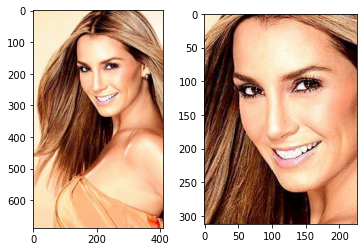

In [ ]:
x = int(row["x_1"])
y = int(row["y_1"])
width = int(row["width"])
height = int(row["height"])

extract_face('/content/000001.jpg', '/content/cropped/000001.jpg', x, y, width, height)